In [74]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

In [94]:
def plot_opensignals(file_path, time_range=None, title="Pulse Oximetry Signal from BITalino"):
    """
    Plot pulse oximetry data from an OpenSignals text file.
    
    Parameters:
    - file_path (str): Path to the OpenSignals text file.
    - time_range (tuple, optional): Tuple of (start_time, end_time) in seconds to plot a specific range.
                                    If None, plots the entire signal.
    - title (str, optional): Title of the plot. Default is "Pulse Oximetry Signal from BITalino".
    """
    # Read the data, skipping the header lines (lines starting with '#')
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):  # Skip header lines
                values = line.strip().split('\t')
                data.append(float(values[-1]))  # Extract the 'A1' column (last column)

    # Convert data to a NumPy array
    signal = np.array(data)

    # Create a time axis based on the sampling rate (1000 Hz)
    sampling_rate = 1000  # Hz
    time = np.arange(0, len(signal)) / sampling_rate  # Time in seconds

    # Apply time range if specified
    if time_range is not None:
        start_time, end_time = time_range
        # Convert time to sample indices
        start_idx = int(start_time * sampling_rate)
        end_idx = int(end_time * sampling_rate)
        # Ensure indices are within bounds
        start_idx = max(0, start_idx)
        end_idx = min(len(signal), end_idx)
        # Slice the signal and time arrays
        signal = signal[start_idx:end_idx]
        time = time[start_idx:end_idx]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(time, signal, label='Pulse Oximetry (A1)', color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Sensor Value (A1)')
    plt.title(title)  # Use the title parameter
    plt.grid(True)
    plt.legend()
    plt.show()

def calculate_amplitude(file_path, time_range=None, sampling_rate=1000):
    """
    Calculate the maximum (peak-to-peak) and average amplitude of a PPG signal from an OpenSignals text file.
    
    Parameters:
    - file_path (str): Path to the OpenSignals text file.
    - time_range (tuple, optional): Tuple of (start_time, end_time) in seconds to analyze a specific range.
                                    If None, analyzes the entire signal.
    - sampling_rate (int, optional): Sampling rate of the data (default is 1000 Hz).
    
    Returns:
    - (max_amplitude, avg_amplitude, time_range): Tuple containing the maximum (peak-to-peak) amplitude,
      average amplitude, and the analyzed time range.
    """
    # Read the data, skipping the header lines (lines starting with '#')
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):  # Skip header lines
                values = line.strip().split('\t')
                data.append(float(values[-1]))  # Extract the 'A1' column (last column)
    
    # Convert data to a NumPy array
    signal = np.array(data)
    time = np.arange(0, len(signal)) / sampling_rate  # Time in seconds
    
    # Apply time range if specified
    if time_range is not None:
        start_time, end_time = time_range
        start_idx = int(start_time * sampling_rate)
        end_idx = int(end_time * sampling_rate)
        signal = signal[start_idx:end_idx]  # Extract relevant segment
    
    # Compute maximum (peak-to-peak) amplitude
    max_amplitude = np.max(signal) - np.min(signal)
    
    # Compute average amplitude (mean absolute deviation from the mean)
    avg_amplitude = np.mean(np.abs(signal - np.mean(signal)))
    
    return max_amplitude, avg_amplitude, time_range


In [52]:
# Example: Plot the entire signal
file_path = "collected_data/bend finger/opensignals_201907007E21_2025-03-09_12-12-28.txt"  # Replace with your file path

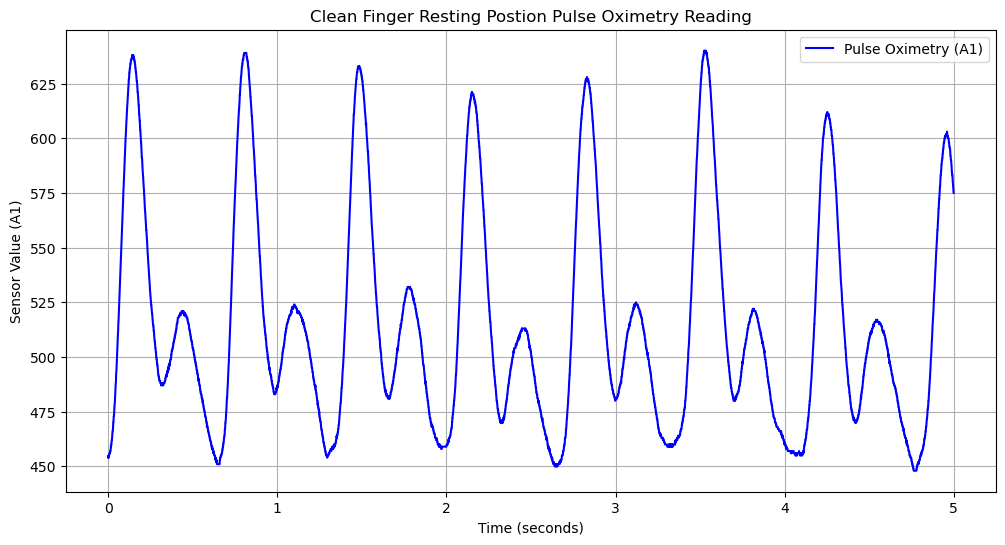

Time Range: (0, 5), Max Amplitude: 192.0, Avg Amplitude: 41.04591712000001


In [105]:
#standard finger form clean
time_range = (0, 5)  # First 5 seconds
plot_opensignals(file_path, time_range, title="Clean Finger Resting Postion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")

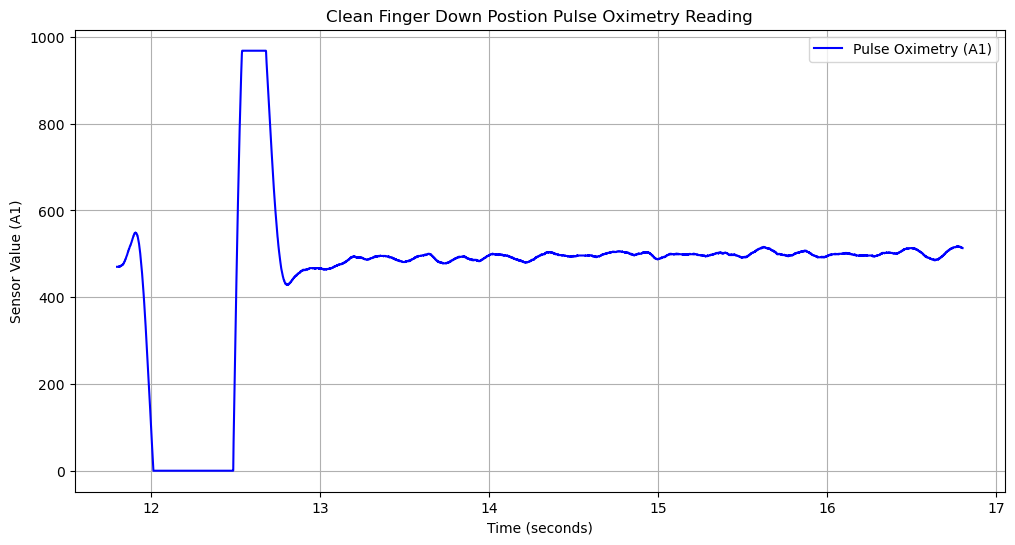

Time Range: (11.8, 16.8), Max Amplitude: 968.0, Avg Amplitude: 95.52146271999999


In [104]:
#bend finger down form clean
time_range = (11.8, 16.8)  # First 5 seconds
plot_opensignals(file_path, time_range, title="Clean Finger Down Postion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")

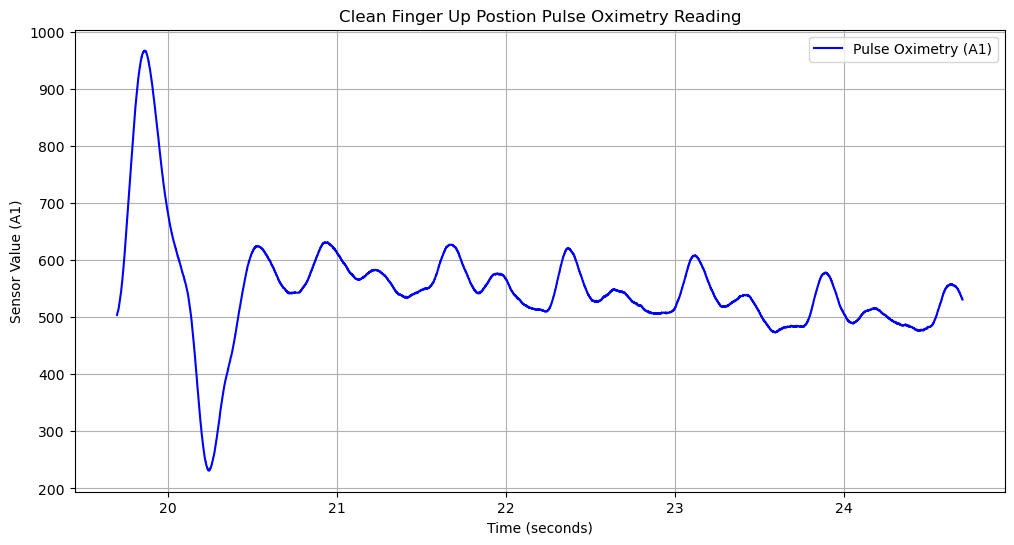

Time Range: (19.7, 24.7), Max Amplitude: 736.0, Avg Amplitude: 56.26723144


In [103]:
#bend finger up clean
time_range = (19.7, 24.7)  # First 5 seconds
plot_opensignals(file_path, time_range, title="Clean Finger Up Postion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")

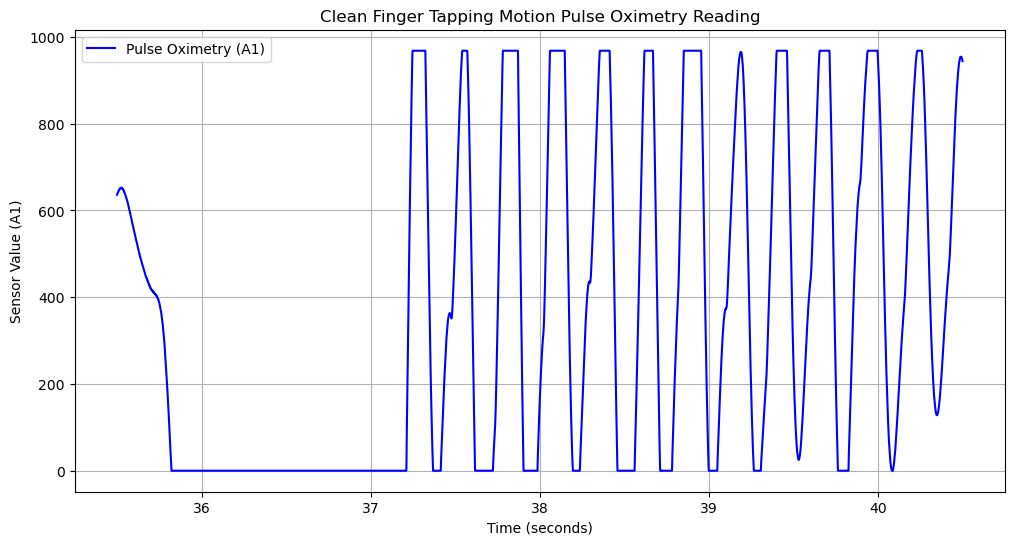

Time Range: (35.5, 40.5), Max Amplitude: 968.0, Avg Amplitude: 340.8862336


In [102]:
#finger tap clean
time_range = (35.5, 40.5)  # First 5 seconds
plot_opensignals(file_path, time_range, title="Clean Finger Tapping Motion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")

In [57]:
########
file_path_dirt = "collected_data/dirty finger/opensignals_201907007E21_2025-03-09_12-26-32.txt"


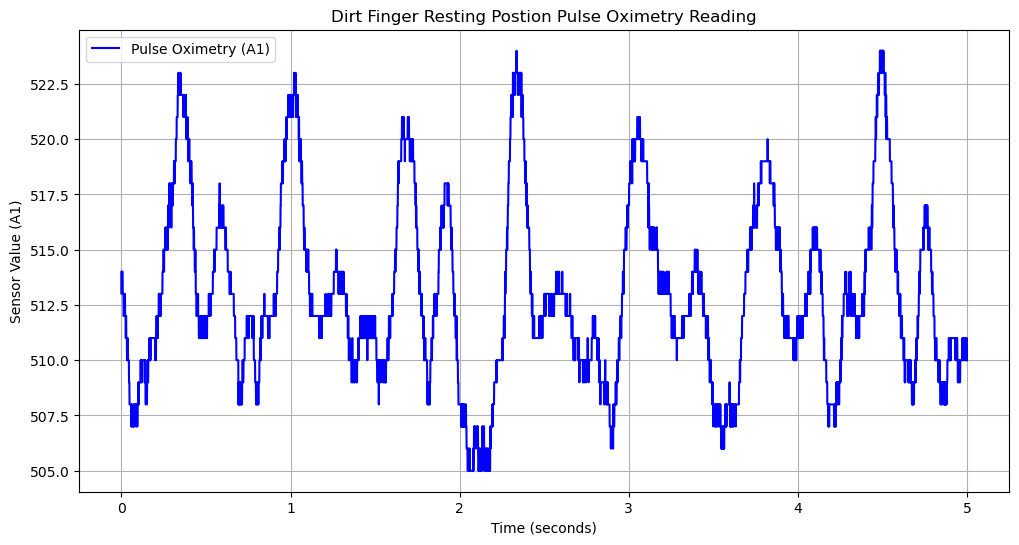

Time Range: (0, 5), Max Amplitude: 19.0, Avg Amplitude: 3.1868684000000003


In [107]:
#dirty still
time_range = (0, 5)
plot_opensignals(file_path_dirt, time_range, title="Dirt Finger Resting Postion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path_dirt, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")

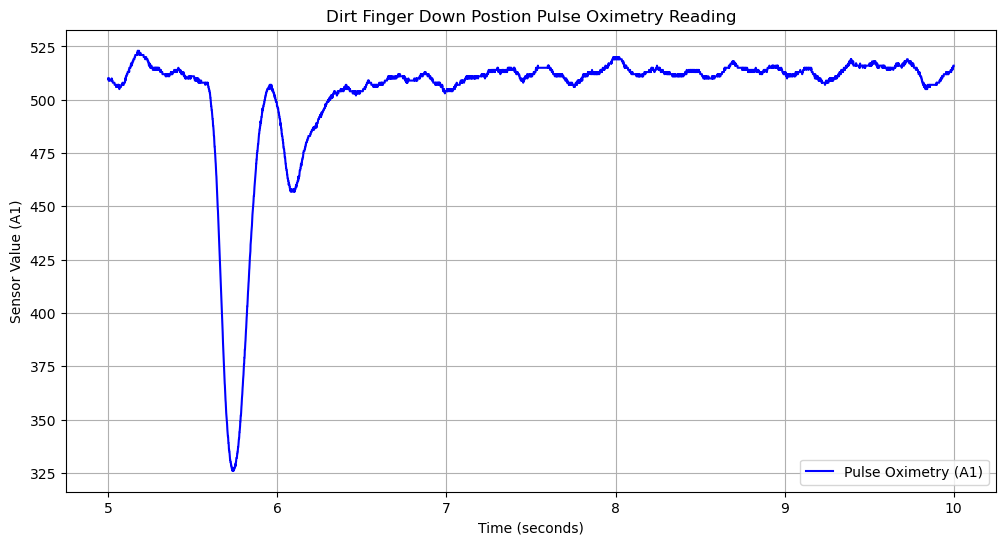

Time Range: (5, 10), Max Amplitude: 197.0, Avg Amplitude: 14.908120400000021


In [109]:
#dirty bend down
time_range = (5, 10)
plot_opensignals(file_path_dirt, time_range, title="Dirt Finger Down Postion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path_dirt, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")

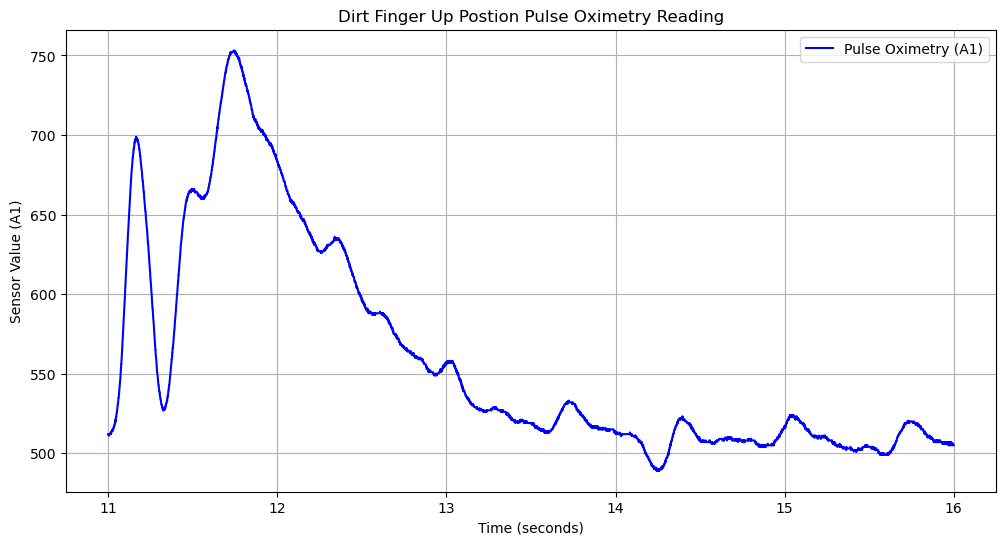

Time Range: (11, 16), Max Amplitude: 264.0, Avg Amplitude: 57.26310863999999


In [111]:
#dirty bend up
time_range = (11, 16)
plot_opensignals(file_path_dirt, time_range, title="Dirt Finger Up Postion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path_dirt, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")

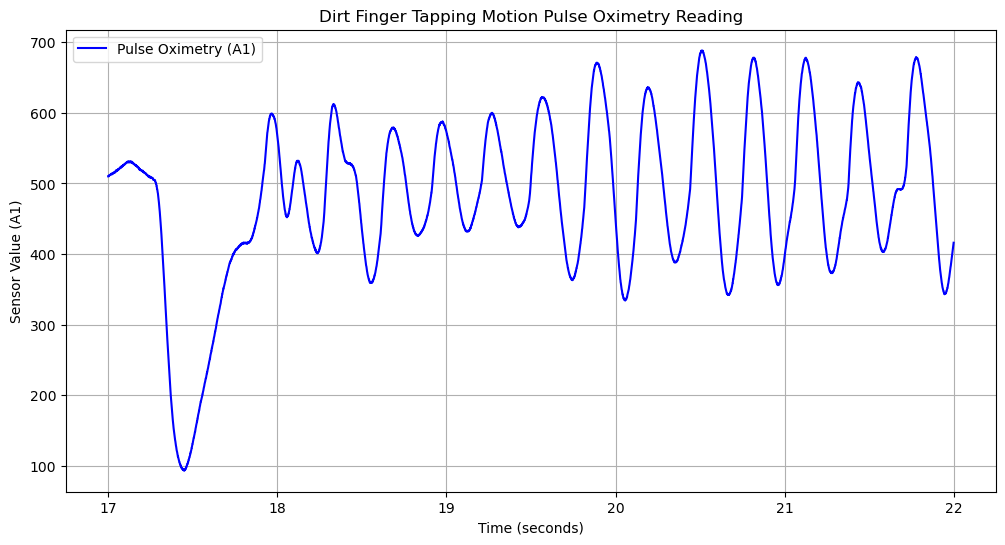

Time Range: (17, 22), Max Amplitude: 595.0, Avg Amplitude: 90.49876832000001


In [112]:
#dirty tap dirty
time_range = (17, 22)
plot_opensignals(file_path_dirt, time_range, title="Dirt Finger Tapping Motion Pulse Oximetry Reading")


max_amp, avg_amp, analyzed_range = calculate_amplitude(file_path_dirt, time_range)
print(f"Time Range: {analyzed_range}, Max Amplitude: {max_amp}, Avg Amplitude: {avg_amp}")